In [37]:
!pip3 install seaborn
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load csv file 
netflix_data = pd.read_csv("NetflixReportAddInfo.csv")

netflix_data.info()
netflix_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16161 non-null  object 
 1   Season               5967 non-null   float64
 2   Available Globally?  16161 non-null  object 
 3   Release Date         6668 non-null   object 
 4   Hours Viewed         16161 non-null  int64  
 5   Runtime              16161 non-null  object 
 6   Views                16161 non-null  object 
 7   Content Type         16161 non-null  object 
 8   Netflix Original?    16161 non-null  object 
 9   Genres               3840 non-null   object 
 10  Language             3840 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language
0,"""Sr.""",NaN,Yes,2022-12-02,100000,1:29,"100,000",Film,Yes,Documentary,English
1,#Alive,NaN,Yes,2020-09-08,7100000,1:38,"4,300,000",Film,No,NaN,NaN
2,#FriendButMarried,NaN,No,NaN,200000,1:42,"100,000",Film,No,NaN,NaN
3,#FriendButMarried 2,NaN,No,NaN,200000,1:44,"100,000",Film,No,NaN,NaN
4,#Manhole,NaN,No,NaN,300000,1:40,"200,000",Film,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16156,Slub Doskonaly,1.0,No,NaN,900000,2:16,"400,000",TV,No,NaN,NaN
16157,tHt lwSy@,1.0,No,NaN,500000,9:00,"100,000",TV,No,NaN,NaN
16158,Carol & The End of The World,1.0,Yes,2023-12-15,10000000,4:51,"2,100,000",TV,Yes,"Adult Animation,Animation,Comedy,Drama",English
16159,[(OSHI NO KO)],1.0,No,NaN,3600000,5:26,"700,000",TV,No,NaN,NaN


## Plot 

In [39]:
netflix_data['Views'] = netflix_data["Views"].replace(",", "", regex=True)
netflix_data['Views'] = netflix_data['Views'].astype(int)

netflix_data = netflix_data.sort_values(by='Views', ascending=False).reset_index(drop=True)


total_views = netflix_data['Views'].sum()

netflix_originals = netflix_data[netflix_data['Netflix Original?']=='Yes']
total_originals_views = netflix_originals['Views'].sum()

In [40]:
print((total_originals_views/total_views)*100)

37.57560483870967


In [41]:
netflix_nonoriginal = netflix_data[netflix_data['Netflix Original?']=='No']
total_notOG_views = netflix_nonoriginal['Views'].sum()
print(total_notOG_views/total_views)

0.6242439516129032


In [42]:
len(netflix_data)

16161

In [43]:
print(len(netflix_data),len(netflix_originals), len(netflix_nonoriginal))
print(f'% of original titles: {100*len(netflix_originals)/len(netflix_data)}')
print(f'% of nonOG titles: {100*len(netflix_nonoriginal)/len(netflix_data)}')

16161 3840 12321
% of original titles: 23.760905884536847
% of nonOG titles: 76.23909411546315


(array([1.5158e+04, 6.1500e+02, 1.9700e+02, 8.0000e+01, 4.8000e+01,
        2.5000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000000e+05, 2.23333333e+07, 4.45666667e+07, 6.68000000e+07,
        8.90333333e+07, 1.11266667e+08, 1.33500000e+08, 1.55733333e+08,
        1.77966667e+08, 2.00200000e+08, 2.22433333e+08, 2.44666667e+08,
        2.66900000e+08, 2.89133333e+08, 3.11366667e+08, 3.33600000e+08,
        3.55833333e+08, 3.78066667e+08, 4.00300000e+08, 4.22533333e+08,
        4.44766667e+08, 4.67000000e+08, 4.89233333e+08, 5.11466667e+08,
        5.33700000e+08, 5.55933333e+08, 5.78166667e+08, 6.00400000e+08,
        6.22633333e+08, 6.44866667e+08, 6.

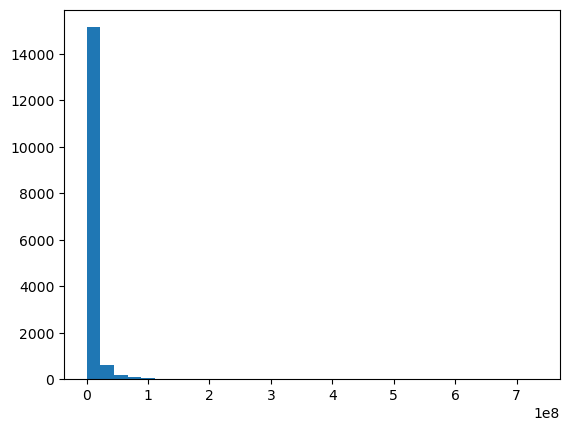

In [44]:
plt.hist(netflix_data['Hours Viewed'],bins=33)

Text(0, 0.5, 'Hours Viewed')

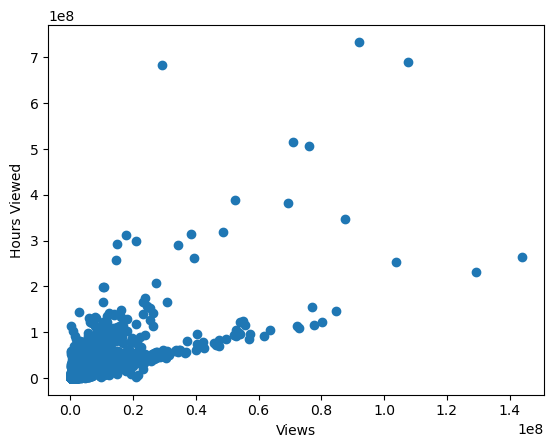

In [45]:
plt.plot(netflix_data['Views'],netflix_data['Hours Viewed'],'o') #Make a scatter plot with circles as markers
plt.xlabel('Views') #Suitable x-axis label
plt.ylabel('Hours Viewed') #Suitable y-axis label


In [46]:
netflix_data['Binary Original'] = netflix_data['Netflix Original?'].apply(lambda x: 1 if x == 'Yes' else 0)
netflix_data['Binary Global Availability'] = netflix_data['Available Globally?'].apply(lambda x: 1 if x == 'Yes' else 0)

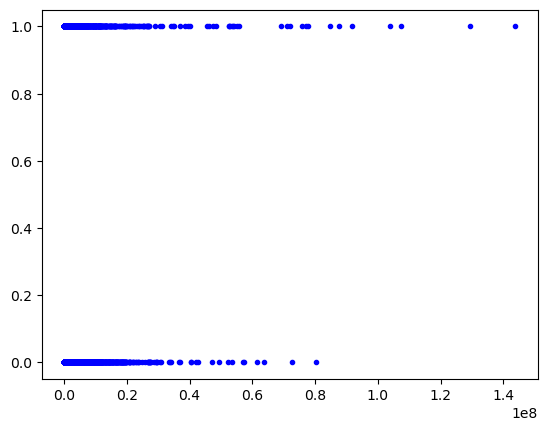

In [47]:
plt.plot(netflix_data['Views'],netflix_data['Binary Original'],'o',markersize=3, color='blue')

In [48]:
netflix_data

,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language,Binary Original,Binary Global Availability
0,Damsel,NaN,Yes,2024-03-08,263700000,1:50,143800000,Film,Yes,"Action,Fantasy",English,1,1
1,Lift,NaN,Yes,2024-01-12,230800000,1:47,129400000,Film,Yes,"Action,Comedy,Thriller",English,1,1
2,Fool Me Once,1.0,Yes,2024-01-01,689500000,6:25,107500000,TV,Yes,"Drama,Thriller",English,1,1
3,Society of the Snow,NaN,Yes,2024-01-04,252500000,2:26,103800000,Film,Yes,"Action,Drama",Spanish,1,1
4,Bridgerton,3.0,Yes,2024-05-16,733800000,7:59,91900000,TV,Yes,"History,Drama,Romance",English,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,The Butterfly's Dream,NaN,No,NaN,100000,1:58,100000,Film,No,NaN,NaN,0,0
16157,The Butterfly Effect,NaN,No,NaN,200000,1:54,100000,Film,No,NaN,NaN,0,0
16158,The Brothers,NaN,No,2001-01-01,100000,1:42,100000,Film,No,NaN,NaN,0,0
16159,The Bromley Boys,NaN,No,NaN,100000,1:42,100000,Film,No,NaN,NaN,0,0


In [49]:
correlation_education_income = netflix_data['Views'].corr(netflix_data['Binary Original'])
print(f'Correlation between Views and Netflix Original: {correlation_education_income}')


Correlation between Views and Netflix Original: 0.10859660242421598


In [50]:
!pip3 install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from sklearn.linear_model import LinearRegression

In [51]:
# Columns for income, education, and a confounding variable (SES used as example if present)
income_column = 'Views'
education_column = 'Binary Original'
confound_column = 'Binary Global Availability'  # Assuming SES could serve as a confound if it's in the data

# Check if required columns exist in the dataset
if education_column in netflix_data.columns and income_column in netflix_data.columns and confound_column in netflix_data.columns:
    # Step 1: Predict income from SES
    X_confound_income = netflix_data[confound_column].values.reshape(-1, 1)  # Predictor: SES
    y_income = netflix_data[income_column].values  # Outcome: Income
    model_income = LinearRegression().fit(X_confound_income, y_income)
    residuals_income = y_income - model_income.predict(X_confound_income)

    # Step 2: Predict education from SES
    y_education = netflix_data[education_column].values  # Outcome: Education
    model_education = LinearRegression().fit(X_confound_income, y_education)
    residuals_education = y_education - model_education.predict(X_confound_income)

    # Step 3: Calculate partial correlation between residuals
    partial_corr = np.corrcoef(residuals_income, residuals_education)[0, 1]
    print(f'Partial correlation between Views and Netflix Original, controlling for Global: {partial_corr}')
else:
    print("Required columns for partial correlation (Education, Income, SES) not found in the dataset.")
 

Partial correlation between Views and Netflix Original, controlling for Global: 0.01611475261583554


R^2 for multiple regression model predicting Views from Original and Global Availability: 0.021
Intercept: 1094011.7952695806
Coefficients: [ 225464.58947224 1323360.93383417] (Original, Global Avail)


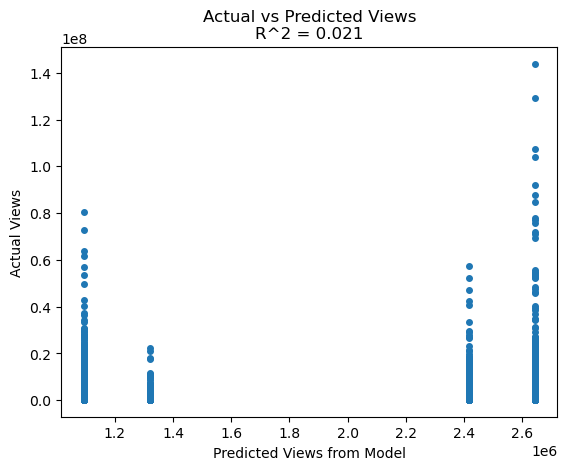

In [52]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #Always good to be able to make plots

# Ensure columns for education, SES, and income exist in the data
income_column = 'Views'
education_column = 'Binary Original'
ses_column = 'Binary Global Availability'

# Check if columns exist in dataset
if education_column in netflix_data.columns and income_column in netflix_data.columns and ses_column in netflix_data.columns:
    # Prepare predictor variables (Education and SES) and outcome variable (Income)
    X = netflix_data[[education_column, ses_column]].values  # Predictors: Education and SES
    y = netflix_data[income_column].values  # Outcome: Income

    # Initialize and fit the multiple regression model
    multiple_regression_model = LinearRegression().fit(X, y)
    
    # Extract R^2, intercept, and coefficients
    r_squared = multiple_regression_model.score(X, y)
    intercept = multiple_regression_model.intercept_
    coefficients = multiple_regression_model.coef_

    # Display results
    print(f'R^2 for multiple regression model predicting Views from Original and Global Availability: {r_squared:.3f}')
    print(f'Intercept: {intercept}')
    print(f'Coefficients: {coefficients} (Original, Global Avail)')

    # Visualize the actual vs predicted income
    y_hat = multiple_regression_model.predict(X)  # Predicted income from the model
    plt.plot(y_hat, y, 'o', markersize=4)
    plt.xlabel('Predicted Views from Model')
    plt.ylabel('Actual Views')
    plt.title(f'Actual vs Predicted Views\nR^2 = {r_squared:.3f}')
else:
    print("Required columns (Education, SES, Income) not found in the dataset.")


In [53]:
netflix_report_sorted = netflix_originals.sort_values(by='Views', ascending=False).reset_index(drop=True)
netflix_report_sorted

,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language
0,Damsel,NaN,Yes,2024-03-08,263700000,1:50,143800000,Film,Yes,"Action,Fantasy",English
1,Lift,NaN,Yes,2024-01-12,230800000,1:47,129400000,Film,Yes,"Action,Comedy,Thriller",English
2,Fool Me Once,1.0,Yes,2024-01-01,689500000,6:25,107500000,TV,Yes,"Drama,Thriller",English
3,Society of the Snow,NaN,Yes,2024-01-04,252500000,2:26,103800000,Film,Yes,"Action,Drama",Spanish
4,Bridgerton,3.0,Yes,2024-05-16,733800000,7:59,91900000,TV,Yes,"History,Drama,Romance",English
...,...,...,...,...,...,...,...,...,...,...,...
3835,"Sex, Explained",1.0,Yes,2020-01-02,200000,1:51,100000,TV,Yes,Documentary,English
3836,Shot in the Dark,1.0,No,2017-11-17,400000,4:57,100000,TV,Yes,"Documentary,Crime",English
3837,Reign Supreme,1.0,Yes,2022-11-18,400000,4:56,100000,TV,Yes,"Biography,Drama",French
3838,She's Gotta Have It,1.0,Yes,2017-11-23,400000,5:51,100000,TV,Yes,"Comedy,Drama",English
